In [1]:
# -*- coding: utf-8 -*- #

# Write libraries here #########################################
import matplotlib.patches as pat
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
# from astroquery.gama import GAMA
from jupyterthemes import jtplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, cluster, preprocessing, mixture
from time import time
from tqdm import tnrange, tqdm_notebook
%matplotlib inline

import seaborn as sns; sns.set(style="ticks", color_codes=True)
# %matplotlib notebook
################################################################

# Showing 500 columns and rows #################################
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
################################################################

# NOT CHANGE (The PATH for directory) ##########################
CURRENT_DIR_NAME = os.path.dirname(os.path.abspath(__name__))
PATH_DATA = os.path.join(CURRENT_DIR_NAME, '../data/')
PATH_HIST = os.path.join(CURRENT_DIR_NAME, '../histogram/')
PATH_PLOT = os.path.join(CURRENT_DIR_NAME, '../plots/')
PATH_IMG = os.path.join(CURRENT_DIR_NAME, '../images/')
PATH_HTML = os.path.join(CURRENT_DIR_NAME, '../html/')
PATH_TEX = os.path.join(CURRENT_DIR_NAME, '../for_tex/')
################################################################

#When you make plots, jtplot is better.
jtplot.style(theme='grade3', context='notebook', fscale=3, spines=True, gridlines='--', ticks=False, grid=False)

In [2]:
completed_data = pd.read_pickle(PATH_DATA + 'GAMADataForManifold.pickle')
DATA_GAMA_FLUX = completed_data.copy()

In [3]:
display(completed_data.describe())

RA           DEC      FUV_flux   FUV_fluxerr      NUV_flux  \
count  73768.000000  73768.000000  7.376800e+04  7.376800e+04  7.376800e+04   
mean     189.651980      0.375954  9.691125e-06  1.433836e-06  1.771798e-05   
std       33.758608      1.356445  7.012375e-05  1.041517e-05  1.183519e-04   
min      129.000109     -2.993768  3.332060e-10  5.765690e-09  9.628900e-10   
25%      175.047449     -0.746373  1.254405e-06  6.841088e-07  4.301507e-06   
50%      212.479781      0.323242  3.529270e-06  8.983840e-07  9.155720e-06   
75%      217.577880      1.461775  8.657525e-06  1.233078e-06  1.696793e-05   
max      223.499878      2.999971  1.114510e-02  1.909930e-03  2.128940e-02   

        NUV_fluxerr        u_flux     u_fluxerr        g_flux     g_fluxerr  \
count  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04   
mean   6.959949e-06  3.941530e-05  5.811074e-06  1.233047e-04  6.644793e-06   
std    7.378952e-05  3.199671e-04  2.849965e-05  1.023210e-03  2.587866e-05   
min    3.340650e-08  1.335430e-08  2.499510e-07  4.235320e-08  1.292490e-07   
25%    9.051390e-07  9.912963e-06  1.989115e-06  3.048285e-05  9.470705e-07   
50%    1.337930e-06  1.797575e-05  2.772085e-06  5.210875e-05  1.543505e-06   
75%    2.466845e-06  3.337297e-05  4.167825e-06  9.683630e-05  3.796227e-06   
max    8.833300e-03  5.932940e-02  1.740130e-03  1.802290e-01  1.697120e-03   

             r_flux     r_fluxerr        i_flux     i_fluxerr        z_flux  \
count  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04   
mean   2.410331e-04  9.234676e-06  3.432591e-04  1.262331e-05  4.200821e-04   
std    1.833359e-03  3.051119e-05  2.540001e-03  3.919699e-05  3.083389e-03   
min    1.538570e-08  1.932670e-07  3.210630e-08  2.658190e-07  4.034540e-08   
25%    6.772207e-05  1.510898e-06  9.731525e-05  2.303157e-06  1.206148e-04   
50%    1.118075e-04  2.541675e-06  1.616545e-04  3.871210e-06  1.992710e-04   
75%    1.949315e-04  5.820015e-06  2.830255e-04  8.681093e-06  3.484990e-04   
max    3.142220e-01  2.135520e-03  4.250200e-01  2.806200e-03  5.119440e-01   

          z_fluxerr        X_flux     X_fluxerr        Y_flux     Y_fluxerr  \
count  7.376800e+04  73768.000000  73768.000000  7.376800e+04  73768.000000   
mean   2.667000e-05     -4.725897     -4.726298  5.097796e-04      0.000035   
std    9.312436e-05     68.551593     68.551566  3.493307e-03      0.000169   
min    9.431560e-07   -999.000000   -999.000000  1.016350e-07      0.000001   
25%    7.361505e-06      0.000121      0.000003  1.429553e-04      0.000006   
50%    1.091005e-05      0.000201      0.000006  2.402225e-04      0.000010   
75%    1.832998e-05      0.000351      0.000013  4.254310e-04      0.000021   
max    4.074100e-03      0.418524      0.003546  5.234810e-01      0.010409   

             J_flux     J_fluxerr        H_flux     H_fluxerr        K_flux  \
count  7.376800e+04  73768.000000  7.376800e+04  73768.000000  7.376800e+04   
mean   6.000265e-04      0.000032  7.329608e-04      0.000037  7.477631e-04   
std    4.066153e-03      0.000131  4.841449e-03      0.000115  4.133784e-03   
min    9.308100e-07      0.000001  7.511100e-07      0.000002  5.765860e-07   
25%    1.667140e-04      0.000006  2.051290e-04      0.000011  2.323077e-04   
50%    2.856250e-04      0.000010  3.538470e-04      0.000016  4.020560e-04   
75%    5.096573e-04      0.000021  6.330400e-04      0.000029  7.051335e-04   
max    6.192200e-01      0.008726  7.565100e-01      0.006519  6.328390e-01   

          K_fluxerr       W1_flux    W1_fluxerr       W2_flux    W2_fluxerr  \
count  73768.000000  73768.000000  73768.000000  7.376800e+04  73768.000000   
mean       0.000038      0.000396      0.000068  2.707400e-04      0.000066   
std        0.000131      0.002416      0.000197  1.440871e-03      0.000228   
min        0.000003      0.000000      0.000005 -5.913180e-09      0.000004   
25%        0.000011      0.000130      0.000039  9.226087e-05 

In [4]:
# Select columns for classification and manifold learning
X = completed_data[['Z_TONRY', 'FUV_flux_kcorrected', 'NUV_flux_kcorrected',
                    'U_flux_kcorrected', 'G_flux_kcorrected', 'R_flux_kcorrected', 'I_flux_kcorrected', 'Z_flux_kcorrected',
                    'Y_flux_kcorrected', 'J_flux_kcorrected', 'H_flux_kcorrected', 'K_flux_kcorrected']]

# # Select columns for classification and manifold learning
# X_ORIG = completed_data[['FUV_flux_kcorrected', 'NUV_flux_kcorrected',
#                     'U_flux_kcorrected', 'G_flux_kcorrected', 'R_flux_kcorrected', 'I_flux_kcorrected', 'Z_flux_kcorrected',
#                     'Y_flux_kcorrected', 'J_flux_kcorrected', 'H_flux_kcorrected', 'K_flux_kcorrected']]

In [5]:
# X['FUV_flux_kcorrected'] = 10**(-0.4*completed_data['FUV_flux_kcorrected']) 
# X['NUV_flux_kcorrected'] = 10**(-0.4*completed_data['NUV_flux_kcorrected'])
# X['U_flux_kcorrected'] = 10**(-0.4*completed_data['U_flux_kcorrected'])
# X['G_flux_kcorrected'] = 10**(-0.4*completed_data['G_flux_kcorrected'])
# X['R_flux_kcorrected'] = 10**(-0.4*completed_data['R_flux_kcorrected'])
# X['I_flux_kcorrected'] = 10**(-0.4*completed_data['I_flux_kcorrected'])
# X['Z_flux_kcorrected'] = 10**(-0.4*completed_data['Z_flux_kcorrected'])
# X['Y_flux_kcorrected'] = 10**(-0.4*completed_data['Y_flux_kcorrected'])
# X['J_flux_kcorrected'] = 10**(-0.4*completed_data['J_flux_kcorrected'])
# X['H_flux_kcorrected'] = 10**(-0.4*completed_data['H_flux_kcorrected'])
# X['K_flux_kcorrected'] = 10**(-0.4*completed_data['K_flux_kcorrected'])

X['FUV_flux_kcorrected'] = 10**(-0.4*completed_data['FUV_flux_kcorrected'] - 8) 
X['NUV_flux_kcorrected'] = 10**(-0.4*completed_data['NUV_flux_kcorrected'] - 8)
X['U_flux_kcorrected'] = 10**(-0.4*completed_data['U_flux_kcorrected'] - 8)
X['G_flux_kcorrected'] = 10**(-0.4*completed_data['G_flux_kcorrected'] - 8)
X['R_flux_kcorrected'] = 10**(-0.4*completed_data['R_flux_kcorrected'] - 8)
X['I_flux_kcorrected'] = 10**(-0.4*completed_data['I_flux_kcorrected'] - 8)
X['Z_flux_kcorrected'] = 10**(-0.4*completed_data['Z_flux_kcorrected'] - 8)
X['Y_flux_kcorrected'] = 10**(-0.4*completed_data['Y_flux_kcorrected'] - 8)
X['J_flux_kcorrected'] = 10**(-0.4*completed_data['J_flux_kcorrected'] - 8)
X['H_flux_kcorrected'] = 10**(-0.4*completed_data['H_flux_kcorrected'] - 8)
X['K_flux_kcorrected'] = 10**(-0.4*completed_data['K_flux_kcorrected'] - 8)

X.describe()

/home/suchetha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/suchetha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/suchetha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Z_TONRY  FUV_flux_kcorrected  NUV_flux_kcorrected  \
count  73768.000000         73768.000000         73768.000000   
mean       0.200553             0.208163             0.375848   
std        0.102923             0.547574             0.599765   
min        0.004455             0.000102             0.000107   
25%        0.125719             0.033647             0.081019   
50%        0.183696             0.094565             0.205968   
75%        0.267543             0.218444             0.460819   
max        0.884314            25.043047            23.473464   

       U_flux_kcorrected  G_flux_kcorrected  R_flux_kcorrected  \
count       73768.000000       73768.000000       73768.000000   
mean            0.901044           2.865406           5.131511   
std             1.030344           2.770476           5.141845   
min             0.010003           0.010651           0.015483   
25%             0.278029           0.952667           1.597425   
50%             0.599116           2.072065           3.618585   
75%             1.161460           3.876985           6.952563   
max            25.059861          25.095925          70.308449   

       I_flux_kcorrected  Z_flux_kcorrected  Y_flux_kcorrected  \
count       73768.000000       73768.000000       73768.000000   
mean            6.778806           8.481946          10.732573   
std             7.189743           9.085164          11.539624   
min             0.017854           0.015359           0.020592   
25%             1.919149           2.340264           2.856872   
50%             4.609121           5.754090           7.232641   
75%             9.173868          11.507546          14.661624   
max           122.774197         193.112621         202.322757   

       J_flux_kcorrected  H_flux_kcorrected  K_flux_kcorrected  
count       73768.000000       73768.000000       73768.000000  
mean           11.409795          14.507252          11.871617  
std            12.330282          15.623930          12.847311  
min             0.019268           0.011659           0.010538  
25%             2.973306           3.674820           2.936555  
50%             7.670558           9.739678           7.920212  
75%            15.633764          20.038260          16.425896  
max           187.351199         229.785656         202.430528

In [6]:
# x_diff = []

# orig_data = np.array(X_ORIG)#[:100,:]
# i=0
# j=1

# p = 0
# while i<11:
#     while j <11:
#         diff = orig_data[:,i] - orig_data[:,j]
#         x_diff.append(diff)
# #         print(i,j)
#         p += 1
        
#         j+=1
#     i += 1
#     j = i+1
    
# # print(f"p={p}")
# x_diff = np.array(x_diff)
# X_DIFF = pd.DataFrame(x_diff.T)
# # X_DIFF = X_DIFF.sample(frac=1).reset_index(drop=True)
# X_DIFF.describe()

In [7]:
# RobustScaler uses [0.25, 0.75] samples
# sc=preprocessing.RobustScaler(quantile_range=(25, 75))#StandardScaler()
sc=preprocessing.StandardScaler(with_mean=True, with_std=True)
# sc=preprocessing.RobustScaler()
sc.fit(X)
X_DIFF=sc.transform(X)

# x=X[:,0]
# y=X[:,1]

# print(X_norm)

pd.DataFrame(X).describe()

Z_TONRY  FUV_flux_kcorrected  NUV_flux_kcorrected  \
count  73768.000000         73768.000000         73768.000000   
mean       0.200553             0.208163             0.375848   
std        0.102923             0.547574             0.599765   
min        0.004455             0.000102             0.000107   
25%        0.125719             0.033647             0.081019   
50%        0.183696             0.094565             0.205968   
75%        0.267543             0.218444             0.460819   
max        0.884314            25.043047            23.473464   

       U_flux_kcorrected  G_flux_kcorrected  R_flux_kcorrected  \
count       73768.000000       73768.000000       73768.000000   
mean            0.901044           2.865406           5.131511   
std             1.030344           2.770476           5.141845   
min             0.010003           0.010651           0.015483   
25%             0.278029           0.952667           1.597425   
50%             0.599116           2.072065           3.618585   
75%             1.161460           3.876985           6.952563   
max            25.059861          25.095925          70.308449   

       I_flux_kcorrected  Z_flux_kcorrected  Y_flux_kcorrected  \
count       73768.000000       73768.000000       73768.000000   
mean            6.778806           8.481946          10.732573   
std             7.189743           9.085164          11.539624   
min             0.017854           0.015359           0.020592   
25%             1.919149           2.340264           2.856872   
50%             4.609121           5.754090           7.232641   
75%             9.173868          11.507546          14.661624   
max           122.774197         193.112621         202.322757   

       J_flux_kcorrected  H_flux_kcorrected  K_flux_kcorrected  
count       73768.000000       73768.000000       73768.000000  
mean           11.409795          14.507252          11.871617  
std            12.330282          15.623930          12.847311  
min             0.019268           0.011659           0.010538  
25%             2.973306           3.674820           2.936555  
50%             7.670558           9.739678           7.920212  
75%            15.633764          20.038260          16.425896  
max           187.351199         229.785656         202.430528

In [8]:
N_COMP = 15

plt.figure(figsize=(10,10))

# #Execute the K-means
# km=cluster.KMeans(n_clusters=N_COMP)
# z_km=km.fit(X_DIFF)

# Execute the VBGMM
vbgm = mixture.BayesianGaussianMixture(n_components=N_COMP, covariance_type='full', max_iter=1000, verbose=1)
vbgm=vbgm.fit(X_DIFF)

labels=vbgm.predict(X_DIFF)

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
  Iteration 140
  Iteration 150
  Iteration 160
  Iteration 170
  Iteration 180
  Iteration 190
  Iteration 200
  Iteration 210
  Iteration 220
  Iteration 230
  Iteration 240
  Iteration 250
  Iteration 260
  Iteration 270
  Iteration 280
  Iteration 290
  Iteration 300
  Iteration 310
  Iteration 320
  Iteration 330
  Iteration 340
  Iteration 350
  Iteration 360
Initialization converged: True


<Figure size 720x720 with 0 Axes>

In [9]:
# Add the label from KMEANS to the original pd.DataFrame
data_for_manifoldlearning_plus_label = X.join(pd.DataFrame(labels, index=X.index, columns=['label']))
DATA_GAMA_FLUX = DATA_GAMA_FLUX.join(pd.DataFrame(labels, index=X.index, columns=['label']))

label:0, center_point=(0.4488693303924497, 2.1961726288831094)
# of samples : 7533
label:1, center_point=(0.8583649823092422, 3.2233532078471008)
# of samples : 854
label:2, center_point=(0.8093180152214977, 3.108125822522953)
# of samples : 3921
label:3, center_point=(0.8923888543550038, 1.9838305104392724)
# of samples : 642
label:4, center_point=(1.0596790577873325, 4.376492412455334)
# of samples : 6404
label:5, center_point=(0.8527878175790462, 2.5502301238132854)
# of samples : 3316
label:6, center_point=(0.35635655728965787, 2.255902511400887)
# of samples : 6573
label:7, center_point=(0.7723487819270562, 4.148818200024825)
# of samples : 1136
label:8, center_point=(0.5831503142473107, 2.3730939746980324)
# of samples : 8264
label:9, center_point=(0.9763937244997455, 4.06475987006024)
# of samples : 5742
label:10, center_point=(0.9483798980966998, 3.8955952496963766)
# of samples : 5363
label:11, center_point=(0.8052561425504338, 2.4759705420802876)
# of samples : 6590
label:12,

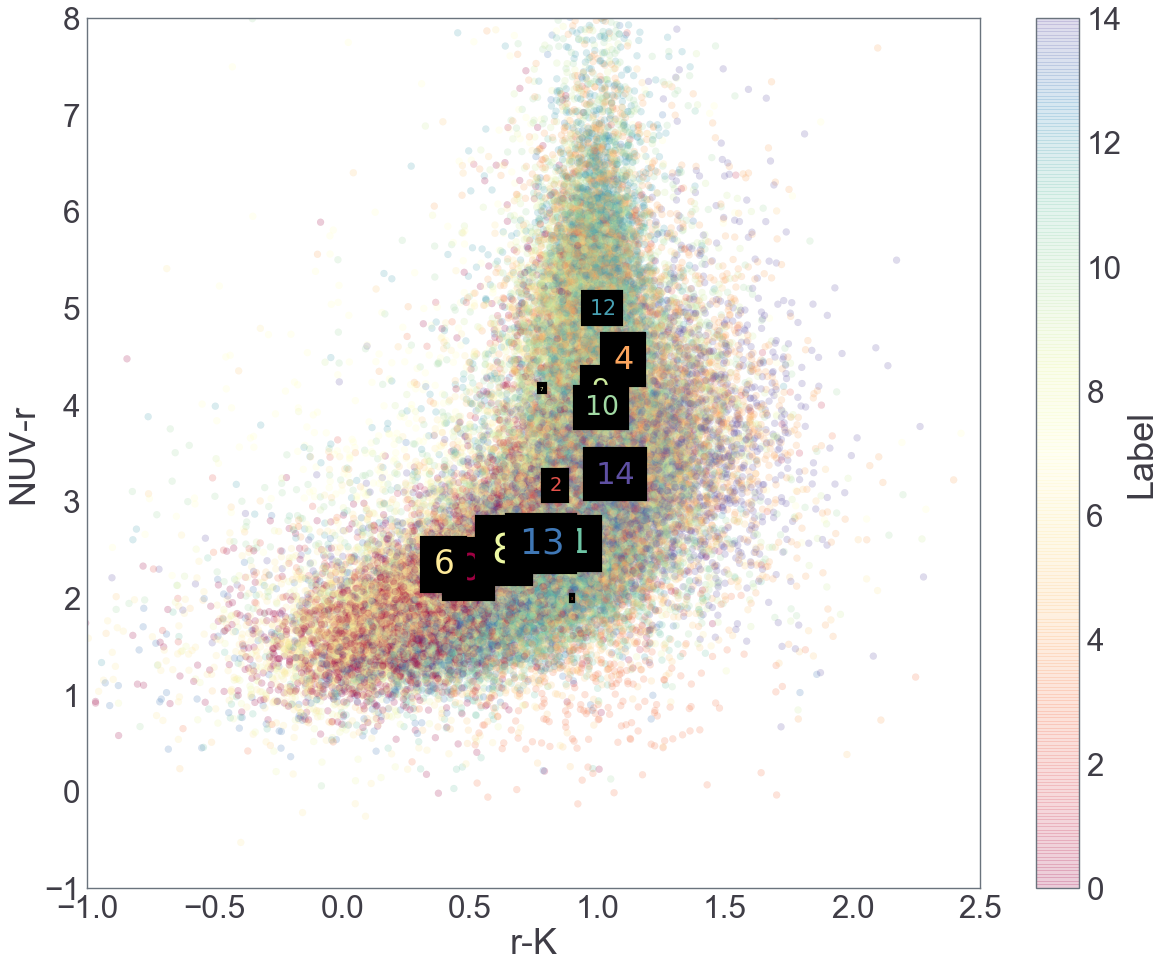

In [10]:
# Show the color-color plot with labels (each number on the plot shows the label number)

plt.figure(figsize=(20, 16))
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax=14)
plt.xlabel('r-K')
plt.xlim([-1, 2.5])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])

for i in tnrange(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i, 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i, 'NUV-R'])
    print('label:%s, center_point=(%s, %s)'%(i, x_mean, y_mean))
    print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i])))
    plt.text(x_mean, y_mean, '$%s$'%(i), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i])/200, color=plt.cm.Spectral(i/14))
    

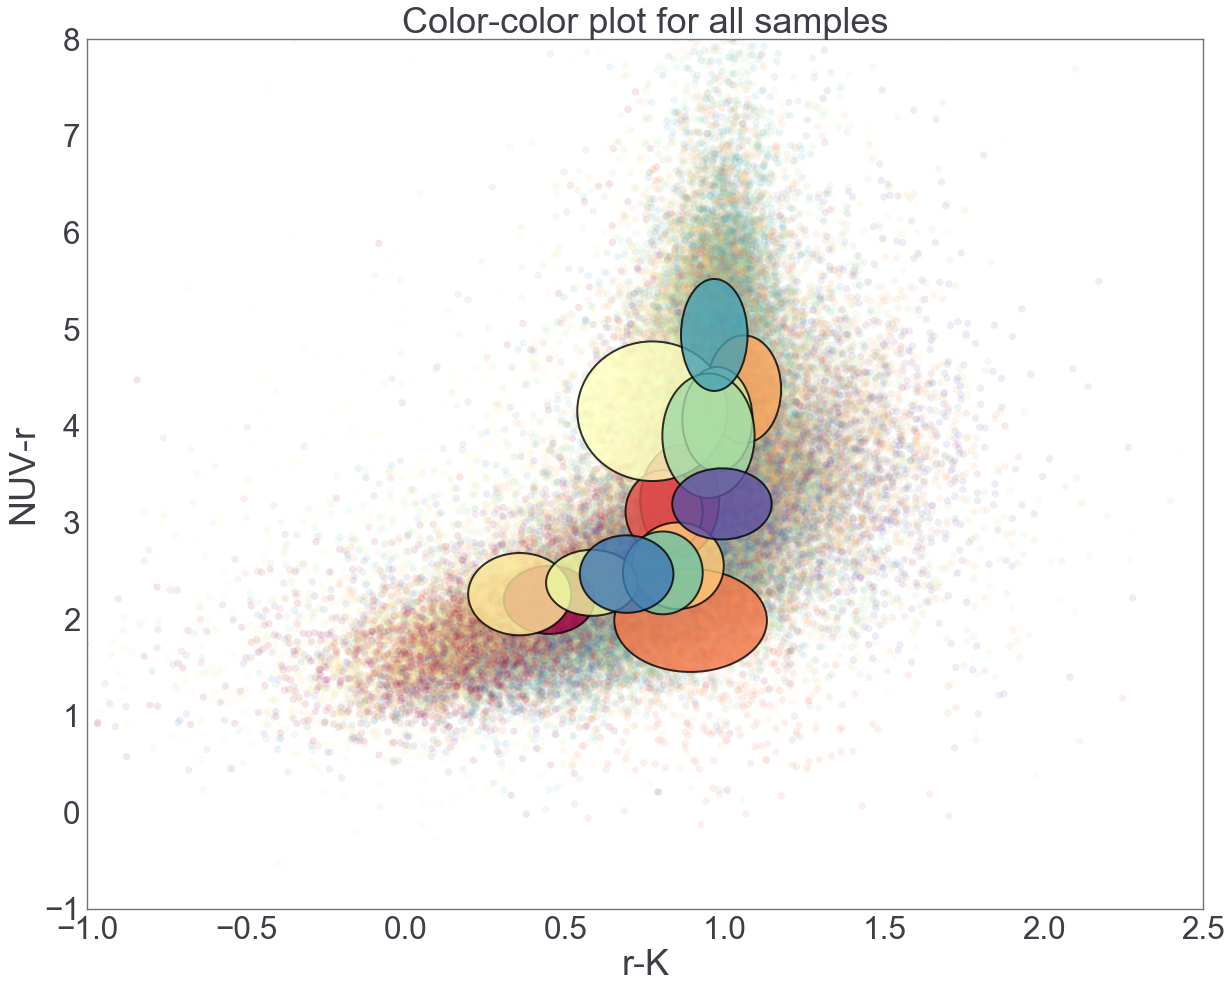

In [11]:
# Show the color-color plot with labels (each number on the plot shows the label number)

f = plt.figure(figsize=(20, 16))
ax = f.add_subplot(111)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
ax.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.1, cmap=plt.cm.Spectral)
ax.set_xlabel('r-K')
ax.set_xlim([-1, 2.5])
ax.set_ylabel('NUV-r')
ax.set_ylim([-1, 8])
ax.set_title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    if not np.isnan(x_mean):
        e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.8, angle = 0, 
                        facecolor =plt.cm.Spectral(j/(N_COMP-1)), edgecolor='black', lw = 2)
        ax.add_patch(e1)

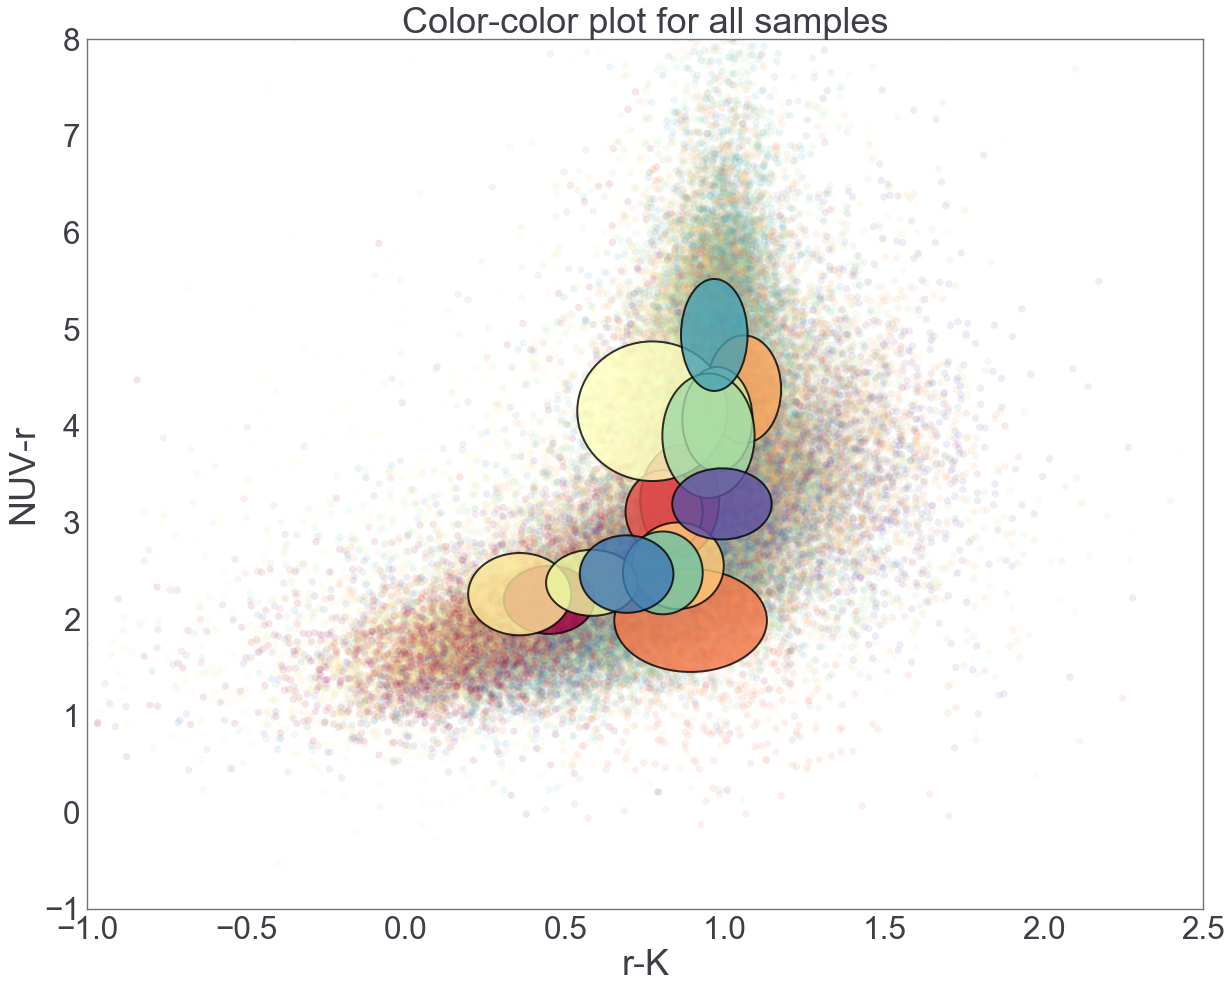

In [12]:
# Show the color-color plot with labels (each number on the plot shows the label number)

f = plt.figure(figsize=(20, 16))
ax = f.add_subplot(111)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
ax.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.1, cmap=plt.cm.Spectral)
ax.set_xlabel('r-K')
ax.set_xlim([-1, 2.5])
ax.set_ylabel('NUV-r')
ax.set_ylim([-1, 8])
ax.set_title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    if not np.isnan(x_mean):
        e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.8, angle = 0, 
                        facecolor =plt.cm.Spectral(j/(N_COMP-1)), edgecolor='black', lw = 2)
        ax.add_patch(e1)

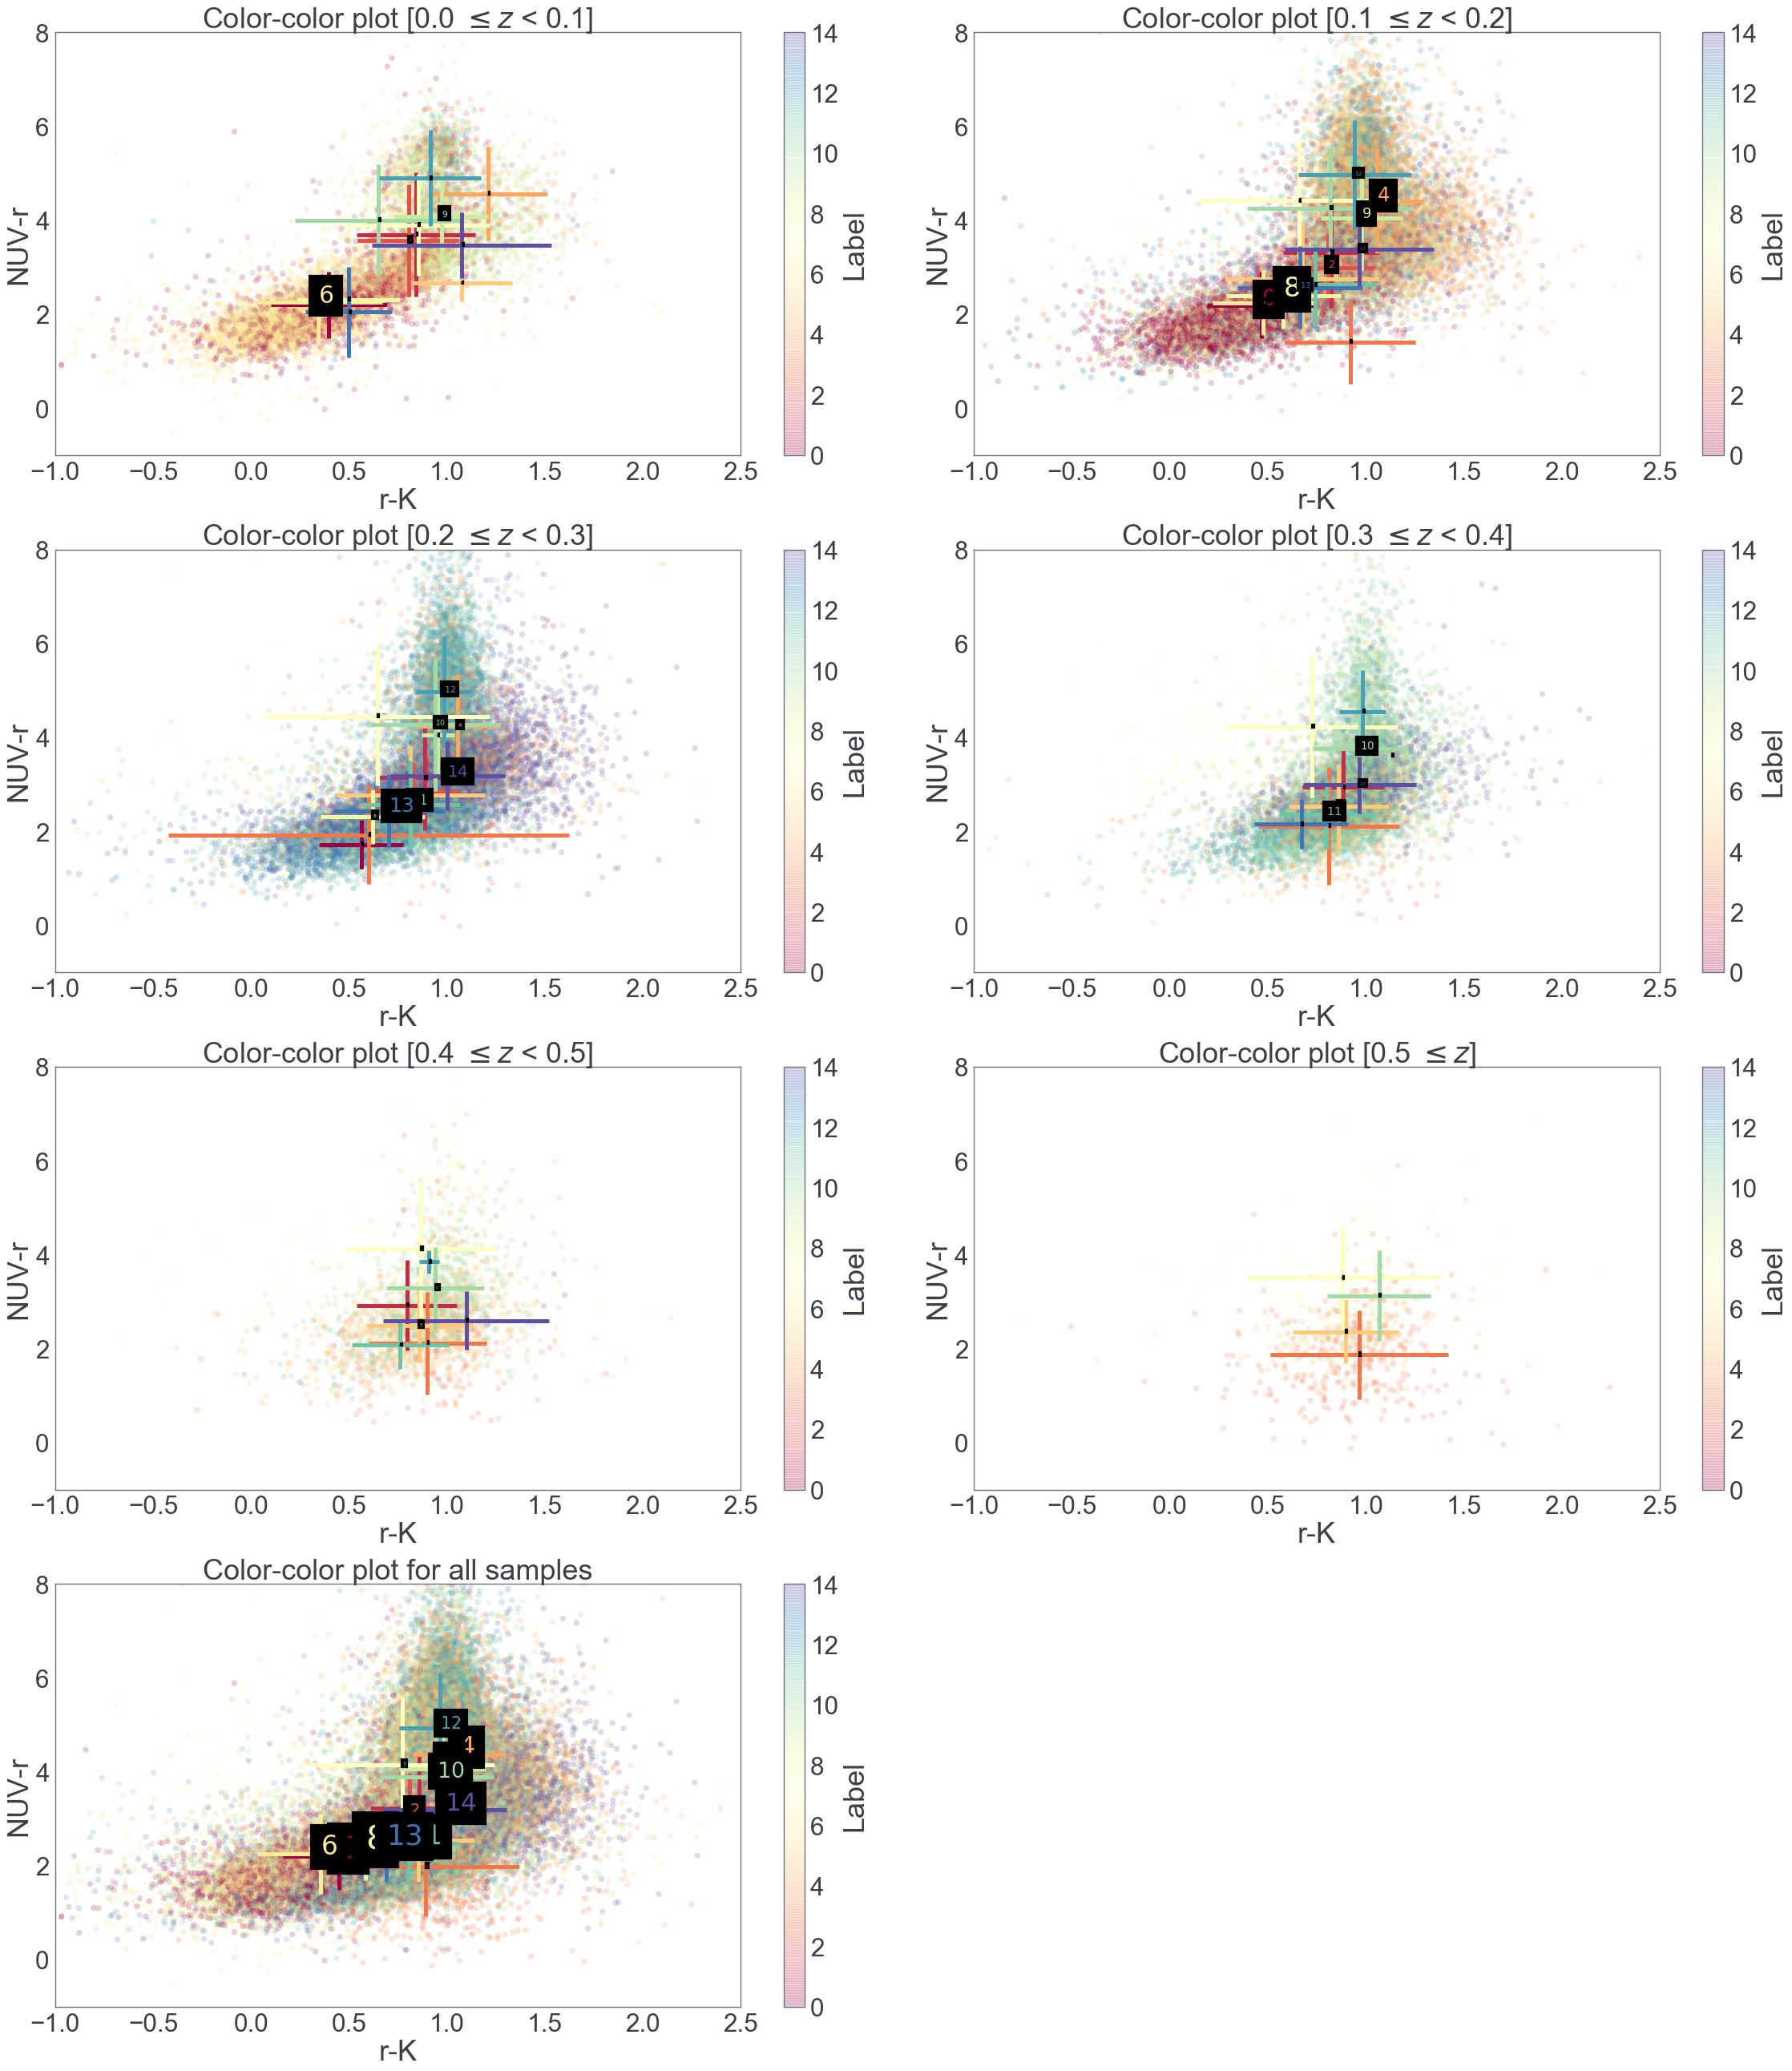

In [13]:
#  Color-color plot with colorbars based on redshift
plt.figure(figsize=(32, 36))
for i in tnrange(6):
    if i <= 4:
        plt.subplot(421 + i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i) & (DATA_GAMA_FLUX['Z_TONRY'] < (0.1 * i) + 0.1)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        plt.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        cbar = plt.colorbar()  
        cbar.set_label('Label')
        plt.clim(vmin=0, vmax=14)
        plt.xlabel('r-K')
        plt.xlim([-1, 2.5])
        plt.ylabel('NUV-r')
        plt.ylim([-1, 8])
        plt.title(r'Color-color plot [%s $\leq z$ < %s]'%('{:.1f}'.format((0.1 * i)), '{:.1f}'.format((0.1 * i) + 0.1)))
        for j in range(15):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/14))
                plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/14))
    else:
        plt.subplot(421 + i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        plt.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        cbar = plt.colorbar()  
        cbar.set_label('Label')
        plt.clim(vmin=0, vmax=14)
        plt.xlabel('r-K')
        plt.xlim([-1, 2.5])
        plt.ylabel('NUV-r')
        plt.ylim([-1, 8])
        plt.title(r'Color-color plot [%s $\leq z$]'%('{:.1f}'.format(0.1 * i)))
        for j in range(15):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/14))
                plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/14))
plt.subplot(427)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax=14)
plt.xlabel('r-K')
plt.xlim([-1, 2.5])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])
plt.title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
    #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
    if not np.isnan(x_mean):
        plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/14))
        plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/14))
plt.tight_layout()

In [ ]:
#  Color-color plot with colorbars based on redshift
fig = plt.figure(figsize=(32, 48))
for i in tnrange(6):
    if i <= 4:
        ax = fig.add_subplot(421+i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i) & (DATA_GAMA_FLUX['Z_TONRY'] < (0.1 * i) + 0.1)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        ax.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        ax.set_xlabel('r-K')
        ax.set_xlim([-1, 2.5])
        ax.set_ylabel('NUV-r')
        ax.set_ylim([-1, 8])
        ax.set_title(r'Color-color plot [%s $\leq z$ < %s]'%('{:.1f}'.format((0.1 * i)), '{:.1f}'.format((0.1 * i) + 0.1)))
        for j in range(15):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.6, angle = 0, color =plt.cm.Spectral(j/(N_COMP-1)))
                ax.add_patch(e1)
    else:
        ax = fig.add_subplot(421+i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        ax.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        ax.set_xlabel('r-K')
        ax.set_xlim([-1, 2.5])
        ax.set_ylabel('NUV-r')
        ax.set_ylim([-1, 8])
        ax.set_title(r'Color-color plot [%s $\leq z$]'%('{:.1f}'.format(0.1 * i)))
        for j in range(15):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.6, angle = 0, color =plt.cm.Spectral(j/(N_COMP-1)))
                ax.add_patch(e1)

ax = fig.add_subplot(427)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
ax.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.1, cmap=plt.cm.Spectral)
ax.set_xlabel('r-K')
ax.set_xlim([-1, 2.5])
ax.set_ylabel('NUV-r')
ax.set_ylim([-1, 8])
ax.set_title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    if not np.isnan(x_mean):
        e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.9, angle = 0, color =plt.cm.Spectral(j/(N_COMP-1)))
        ax.add_patch(e1)
        
plt.subplot(428)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax=N_COMP-1)
plt.xlabel('r-K')
plt.xlim([-1, 2.5])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])
plt.title('Color-color plot for all samples')
for j in range(15):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
    #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
    if not np.isnan(x_mean):
        plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
        plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5)
plt.tight_layout()